In [387]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.preprocessing import StandardScaler
import numpy as np



### Operational / Behavioral

What are the key differences in purchasing patterns between high-value and low-value customers, and how can this inform personalized marketing strategies?



In [388]:

rfm = pd.read_csv("rfm_cleaned.csv") 

rfm.head(10)

,CustomerID,Recency,Frequency,Monetary,Segment,Country,aov,RevenueContribution
0,12346,325,1,1.04,Inactive,United Kingdom,1.040000,0.000001
1,12347,1,7,481.21,VIP,Iceland,68.744286,0.000463
2,12348,74,4,178.71,Middle Class,Finland,44.677500,0.000172
3,12349,18,1,605.10,Middle Class,Italy,605.100000,0.000582
4,12350,309,1,65.30,Inactive,Norway,65.300000,0.000063
5,12352,35,8,1354.11,VIP,Norway,169.263750,0.001303
6,12353,203,1,24.30,Inactive,Bahrain,24.300000,0.000023
7,12354,231,1,261.22,Inactive,Spain,261.220000,0.000251
8,12355,213,1,54.65,Inactive,Bahrain,54.650000,0.000053
9,12356,22,3,188.87,Middle Class,Portugal,62.956667,0.000182


In [389]:
df = pd.read_csv("data\online_retail.csv") 
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [390]:
# Assign Segments based on the K-Means Clustering results to the original data
df = df.merge(rfm[['CustomerID', 'Segment']], on='CustomerID', how='right')


In [391]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Inactive
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,Inactive
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,VIP
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,VIP
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,VIP


In [392]:
df.shape

(354188, 9)

In [393]:
# Convert 'InvoiceDate' to datetime format and CustomerID to integer
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354188 entries, 0 to 354187
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354188 non-null  object        
 1   StockCode    354188 non-null  object        
 2   Description  354188 non-null  object        
 3   Quantity     354188 non-null  int64         
 4   InvoiceDate  354188 non-null  datetime64[ns]
 5   UnitPrice    354188 non-null  float64       
 6   CustomerID   354188 non-null  int32         
 7   Country      354188 non-null  object        
 8   Segment      354188 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 25.7+ MB


In [394]:
# Add year, month (as name) columns
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.strftime('%B')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Year,Month
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Inactive,2011,January
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,Inactive,2011,January
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,VIP,2010,December
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,VIP,2010,December
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,VIP,2010,December
5,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland,VIP,2010,December
6,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December
7,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December
8,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December
9,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December


Relevant KPIs:

Purchase Frequency: orders per month / year

Average Basket Size: items per order

Product Preferences: most purchased products per segment

Seasonality / Peak Purchase Times: trends by month/day/weekday


Return Rate: if data allows (negative quantities indicate returns)





In [395]:
# Exclude purchases that were returned


# Step 1: add Type column
df["Type"] = df["InvoiceNo"].str.startswith("C").map({True: "return", False: "purchase"})

# Step 2: build match_key for matching purchases and returns
df["match_key"] = (
    df["CustomerID"].astype(str)
    + "_" + df["StockCode"].astype(str)
    + "_" + df["Quantity"].abs().astype(str)
    + "_" + df["UnitPrice"].astype(str)
)

# Step 3: collect all match_keys that are returns
return_keys = df.loc[df["Type"] == "return", "match_key"].unique()

# Step 4: create IsReturned column
df["IsReturned"] = None  # initialize

df.loc[df["Type"] == "purchase", "IsReturned"] = df.loc[df["Type"] == "purchase", "match_key"].isin(return_keys)
df.loc[df["Type"] == "return", "IsReturned"] = "Is a return"

# Step 5: drop helper column if you don’t need it
df = df.drop(columns="match_key")

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Year,Month,Type,IsReturned
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Inactive,2011,January,purchase,True
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,Inactive,2011,January,return,Is a return
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,VIP,2010,December,purchase,False
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,VIP,2010,December,purchase,False
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,VIP,2010,December,purchase,False
5,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland,VIP,2010,December,purchase,False
6,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December,purchase,False
7,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December,purchase,False
8,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December,purchase,False
9,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347,Iceland,VIP,2010,December,purchase,False


**Purchase Frequency**: orders per month and year

In [396]:
# Add Order ID column as unique InvoiceNo + CustomerID combination
df['OrderID'] = df['InvoiceNo'] + '_' + df['CustomerID'].astype(str)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Year,Month,Type,IsReturned,OrderID
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Inactive,2011,January,purchase,True,541431_12346
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,Inactive,2011,January,return,Is a return,C541433_12346
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,VIP,2010,December,purchase,False,537626_12347
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,VIP,2010,December,purchase,False,537626_12347
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,VIP,2010,December,purchase,False,537626_12347


In [397]:
# Purchase Frequency: orders per month by 'IsReturned' status
purchase_freq = df.groupby(['Year', 'Month', 'IsReturned']).agg({'OrderID': 'nunique'}).reset_index()
purchase_freq = purchase_freq.sort_values(by=['Year', 'Month'], ascending=[True, True])
purchase_freq.rename(columns={'OrderID': 'PurchaseFrequency'}, inplace=True)    
purchase_freq

,Year,Month,IsReturned,PurchaseFrequency
0,2010,December,False,1173
1,2010,December,True,123
2,2010,December,Is a return,252
3,2011,April,False,979
4,2011,April,True,116
5,2011,April,Is a return,204
6,2011,August,False,1097
7,2011,August,True,122
8,2011,August,Is a return,210
9,2011,December,False,671


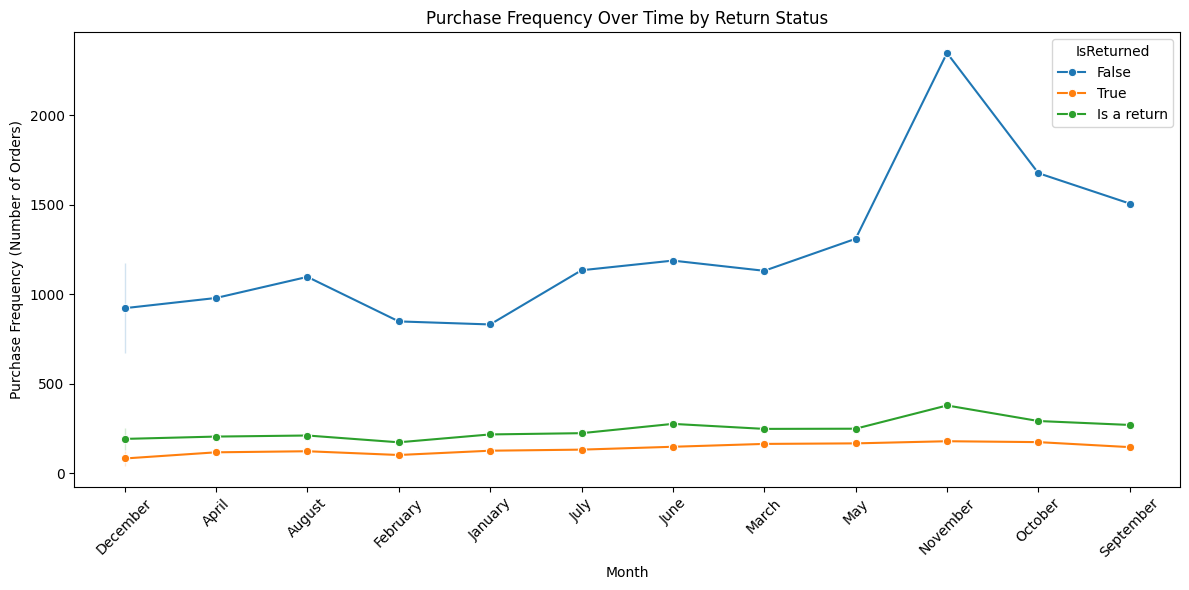

In [398]:
# Visulaize Purchase Frequency
plt.figure(figsize=(12, 6))
sns.lineplot(data=purchase_freq, x='Month', y='PurchaseFrequency', hue='IsReturned', marker='o')
plt.title('Purchase Frequency Over Time by Return Status')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency (Number of Orders)')
plt.xticks(rotation=45)
#plt.legend(title='Is Returned', labels=['Not Returned', 'Returned', 'Is a return'])
plt.tight_layout()
plt.show()

In [399]:
# Purchase Frequency by status and segment
purchase_freq_segment = df.groupby(['Year', 'Month', 'IsReturned', 'Segment']).agg({'OrderID': 'nunique'}).reset_index()
purchase_freq_segment = purchase_freq_segment.sort_values(by=['Year', 'Month'], ascending=[True, True])
purchase_freq_segment.rename(columns={'OrderID': 'PurchaseFrequency'}, inplace=True)
purchase_freq_segment

,Year,Month,IsReturned,Segment,PurchaseFrequency
0,2010,December,False,Inactive,197
1,2010,December,False,Middle Class,303
2,2010,December,False,VIP,673
3,2010,December,True,Inactive,15
4,2010,December,True,Middle Class,23
...,...,...,...,...,...
112,2011,September,True,Middle Class,43
113,2011,September,True,VIP,88
114,2011,September,Is a return,Inactive,21
115,2011,September,Is a return,Middle Class,96


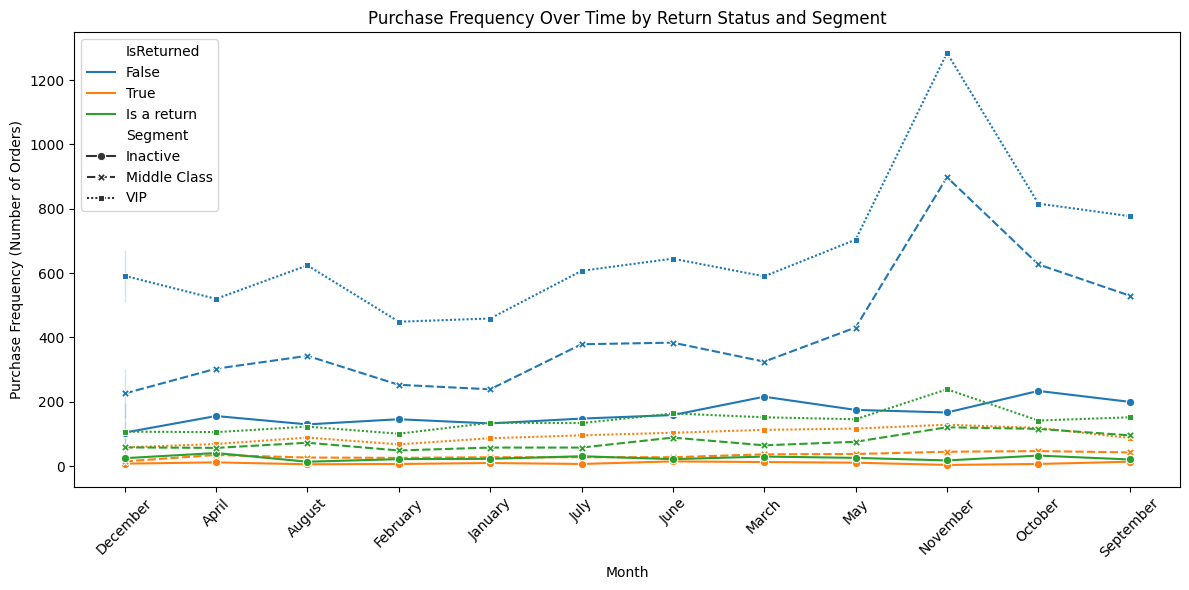

In [400]:
# Visualization Purchase Frequency by status and segment
plt.figure(figsize=(12, 6))
sns.lineplot(data=purchase_freq_segment, x='Month', y='PurchaseFrequency', hue='IsReturned', style='Segment', markers=True)
plt.title('Purchase Frequency Over Time by Return Status and Segment')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency (Number of Orders)')
plt.xticks(rotation=45)
#plt.legend(title='Is Returned', labels=['Not Returned', 'Returned', 'Is a return'])
plt.tight_layout()
plt.show()

**Average Basket Size**: items per order

In [401]:
# Average Basket Size: items per order by Segment

avg_basket_size = df.groupby(['OrderID', 'Segment']).agg({'Quantity': 'mean'}).reset_index()
avg_basket_size

,OrderID,Segment,Quantity
0,536367_13047,VIP,6.916667
1,536368_13047,VIP,3.750000
2,536369_13047,VIP,3.000000
3,536370_12583,VIP,22.450000
4,536371_13748,Middle Class,80.000000
...,...,...,...
19214,C581468_13599,VIP,-11.000000
19215,C581470_17924,VIP,-4.000000
19216,C581484_16446,Middle Class,-80995.000000
19217,C581490_14397,VIP,-11.500000


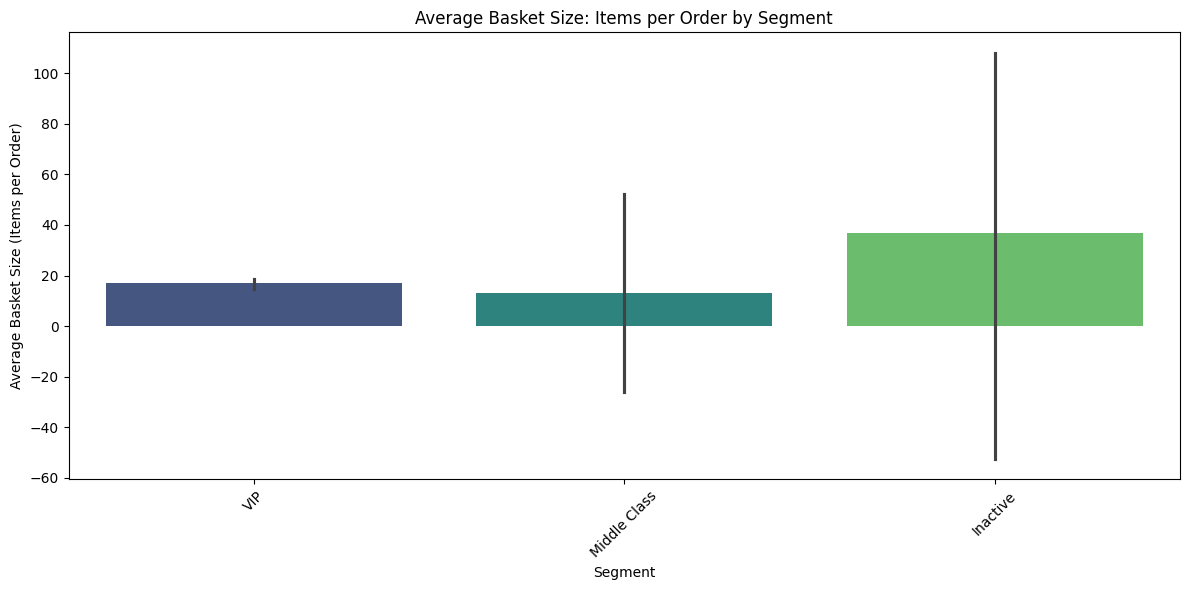

In [402]:
# Visualization Average Basket Size: items per order by Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_basket_size, x='Segment', y='Quantity', hue='Segment', palette='viridis')
plt.title('Average Basket Size: Items per Order by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Basket Size (Items per Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [403]:
# Inactive Customers

inactive_customers = df[df['Segment'] == 'Inactive'].copy()
avg_basket_size = inactive_customers.groupby(['OrderID', 'Segment']).agg({'Quantity': 'mean'}).reset_index()
avg_basket_size

,OrderID,Segment,Quantity
0,536374_15100,Inactive,32.000000
1,536384_18074,Inactive,14.615385
2,536388_16250,Inactive,7.714286
3,536393_13747,Inactive,8.000000
4,536403_12791,Inactive,48.500000
...,...,...,...
2422,C580179_13352,Inactive,-2.000000
2423,C580701_14793,Inactive,-3.000000
2424,C580954_12967,Inactive,-14.923077
2425,C581128_12785,Inactive,-3.000000


**Product Preferences**: most purchased products per segment

In [404]:
# Most Purchased Products per Segment and by Status
most_purchased = df.groupby(['Segment', 'IsReturned', 'Description']).agg({'Quantity': 'sum'}).reset_index()
most_purchased = most_purchased.sort_values(by=['Segment', 'IsReturned', 'Quantity'], ascending=[True, True, False])
most_purchased = most_purchased[most_purchased['Quantity'] > 50]    
most_purchased

,Segment,IsReturned,Description,Quantity
2515,Inactive,False,SMALL CHINESE STYLE SCISSOR,11693
1757,Inactive,False,PACK OF 72 RETROSPOT CAKE CASES,6823
2936,Inactive,False,WORLD WAR 2 GLIDERS ASSTD DESIGNS,6541
177,Inactive,False,ASSORTED COLOURS SILK FAN,5888
905,Inactive,False,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,5610
...,...,...,...,...
13143,VIP,True,TEA TIME PARTY BUNTING,56
12965,VIP,True,RED POLKADOT BEAKER,54
12424,VIP,True,ALARM CLOCK BAKELIKE RED,52
12950,VIP,True,RECIPE BOX PANTRY YELLOW DESIGN,52


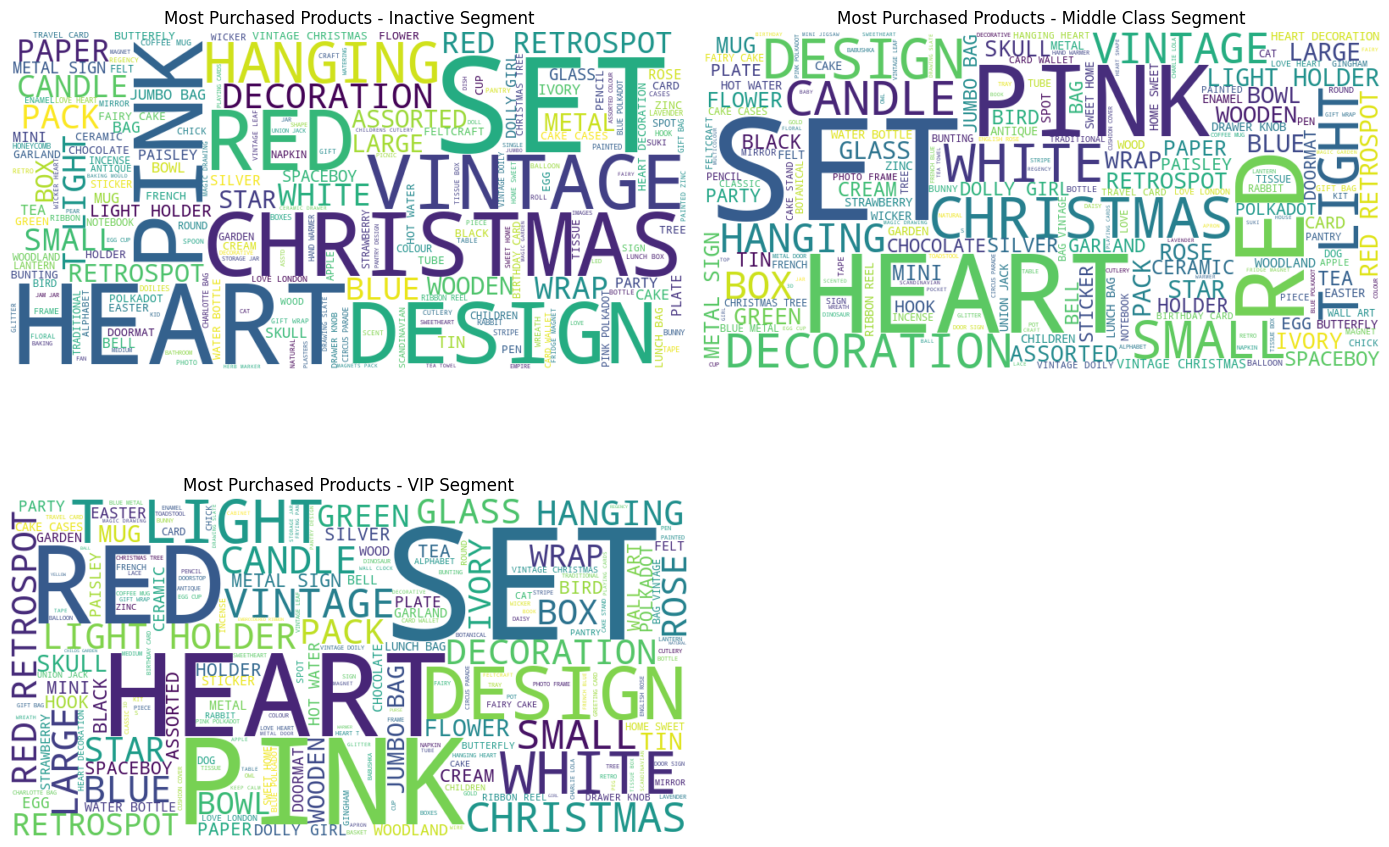

In [405]:
# Plot a Wordclouds with the most purchased products per segment and by status
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))    
for i, (segment, group) in enumerate(most_purchased.groupby('Segment'), 1):
    plt.subplot(2, 2, i)
    text = ' '.join(group['Description'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Purchased Products - {segment} Segment')
    plt.axis('off')
plt.tight_layout()
plt.show()

**Seasonality / Peak Purchase Times**: trends by month/day/weekday

In [406]:
# Add a column for Day of the week and time of the day
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['TimeOfDay'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Year,Month,Type,IsReturned,OrderID,DayOfWeek,TimeOfDay
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,Inactive,2011,January,purchase,True,541431_12346,Tuesday,10
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,Inactive,2011,January,return,Is a return,C541433_12346,Tuesday,10
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,VIP,2010,December,purchase,False,537626_12347,Tuesday,14
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,VIP,2010,December,purchase,False,537626_12347,Tuesday,14
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,VIP,2010,December,purchase,False,537626_12347,Tuesday,14


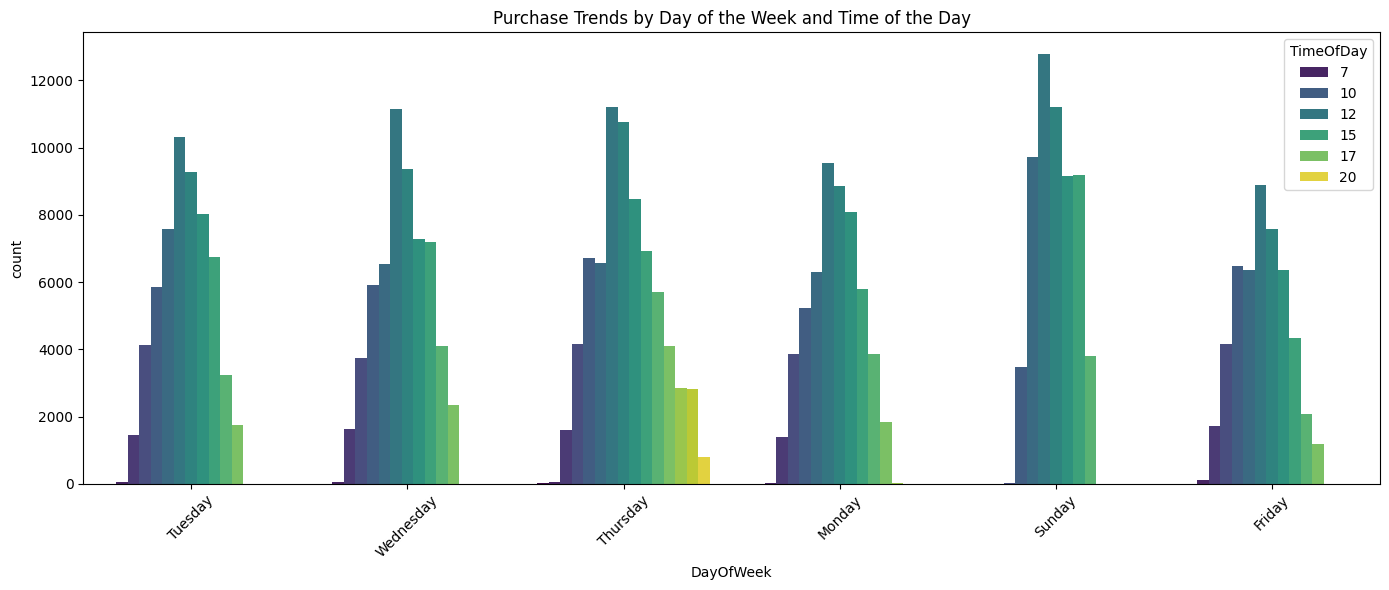

In [407]:
# Plot purchase trends by day of the week and time of the day and 
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='DayOfWeek', hue='TimeOfDay', palette='viridis')
plt.title('Purchase Trends by Day of the Week and Time of the Day')
plt.xticks(rotation=45)
#plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

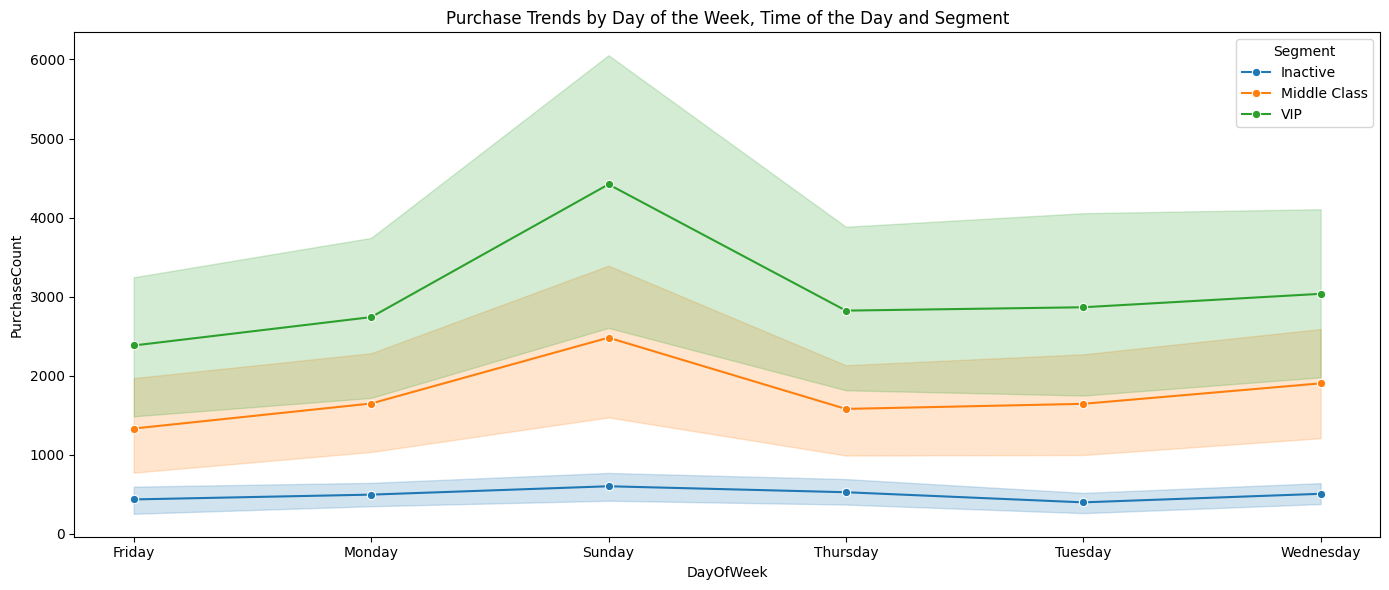

In [408]:
# Plot purchase trends by day of the week and time of the day and Segment
day_time_trend_segment = df.groupby(['DayOfWeek', 'TimeOfDay', 'Segment']).size().reset_index(name='PurchaseCount')
plt.figure(figsize=(14, 6)) 
sns.lineplot(data=day_time_trend_segment, x='DayOfWeek', y='PurchaseCount', hue='Segment', marker='o')
plt.title('Purchase Trends by Day of the Week, Time of the Day and Segment')
#plt.xticks(rotation=45)
#plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

**Return Rate**: if data allows (negative quantities indicate returns)

In [409]:
# Return rate per month and segment
return_rate = df[df['IsReturned'] == True].groupby(['Year', 'Month', 'Segment']).agg({'OrderID': 'nunique'}).reset_index()
total_orders = df.groupby(['Year', 'Month', 'Segment']).agg({'OrderID': 'nunique'}).reset_index()
return_rate = return_rate.merge(total_orders, on=['Year', 'Month', 'Segment'], suffixes=('_Returned', '_Total'))
return_rate['ReturnRate'] = return_rate['OrderID_Returned'] / return_rate['OrderID_Total']
return_rate

,Year,Month,Segment,OrderID_Returned,OrderID_Total,ReturnRate
0,2010,December,Inactive,15,239,0.062762
1,2010,December,Middle Class,23,379,0.060686
2,2010,December,VIP,85,819,0.103785
3,2011,April,Inactive,12,200,0.060000
4,2011,April,Middle Class,35,366,0.095628
5,2011,April,VIP,69,633,0.109005
6,2011,August,Inactive,6,144,0.041667
7,2011,August,Middle Class,27,420,0.064286
8,2011,August,VIP,89,749,0.118825
9,2011,December,Inactive,1,22,0.045455


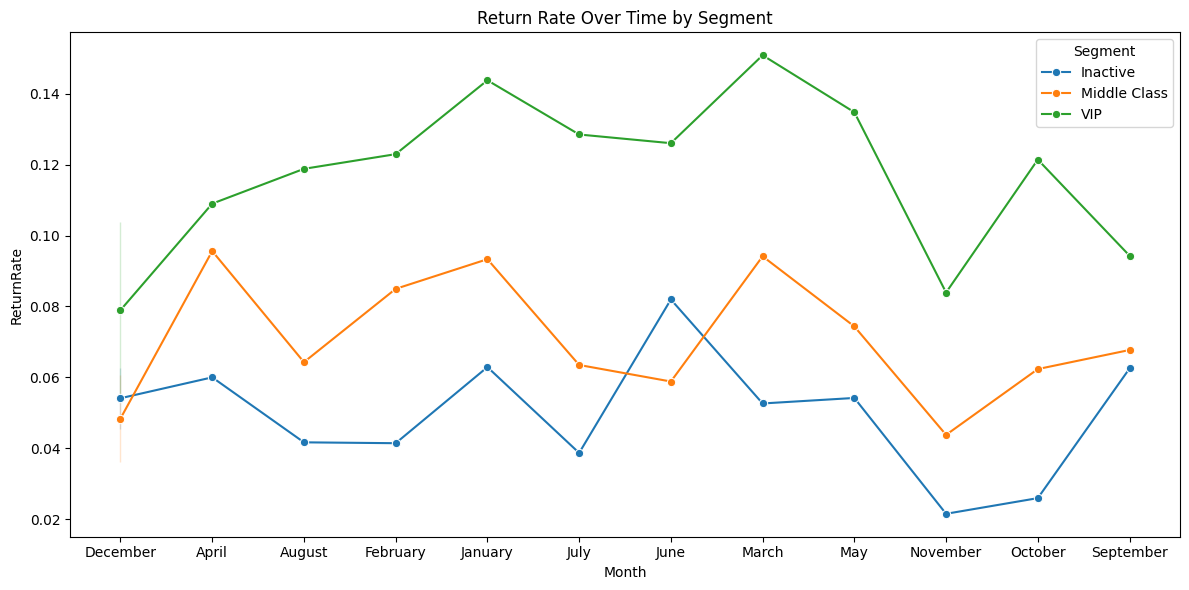

In [410]:
# Visualization Return Rate 
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=return_rate, x='Month', y='ReturnRate', hue='Segment', marker='o')
plt.title('Return Rate Over Time by Segment')
#plt.xticks(rotation=45)
#plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

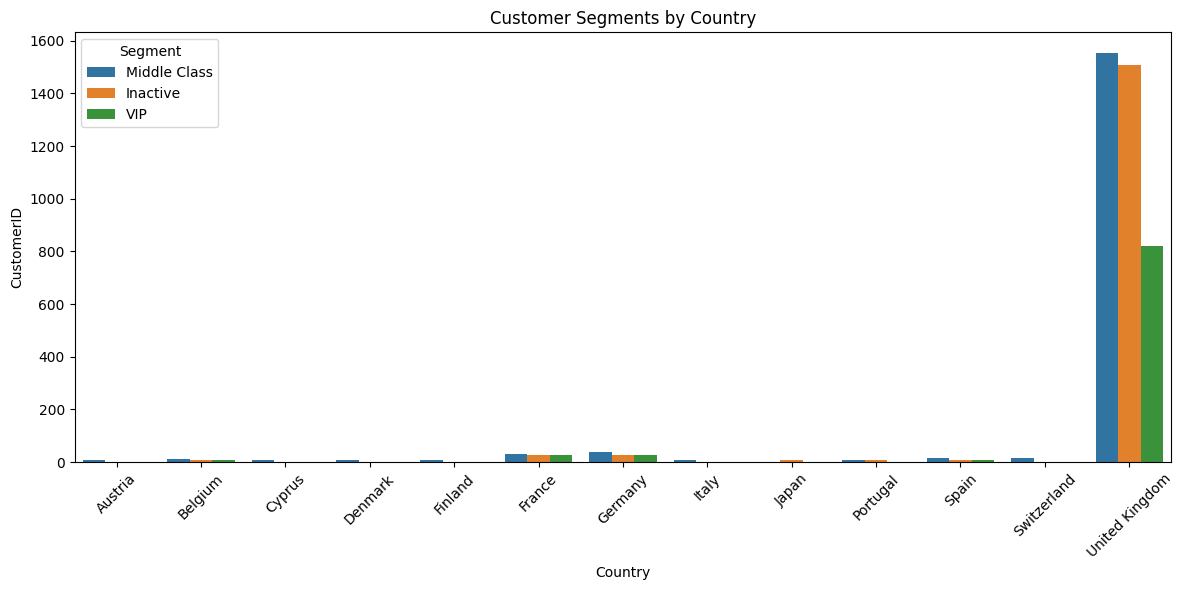

In [411]:
# Visualization Segments by Country with more than 5 customers

country_segment = df.groupby(['Country', 'Segment']).agg({'CustomerID': 'nunique'}).reset_index()
country_segment = country_segment.sort_values(by=['Country', 'Segment'], ascending=[True, True])
country_segment = country_segment[country_segment['CustomerID'] > 5]

plt.figure(figsize=(12, 6))
sns.barplot(data=country_segment, x='Country', y='CustomerID', hue='Segment')
plt.title('Customer Segments by Country')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

In [412]:
# Visualization Inactive Customers by Country
inactive_customers_country = inactive_customers.groupby('Country').agg({'CustomerID': 'nunique'}).reset_index()
inactive_customers_country = inactive_customers_country.sort_values(by='CustomerID', ascending=False).head(10)
inactive_customers_country

,Country,CustomerID
28,United Kingdom,1508
10,France,28
11,Germany,25
23,Spain,8
15,Japan,7
3,Belgium,6
21,Portugal,6
14,Italy,5
1,Austria,4
19,Norway,4


In [413]:
# Visulization VIP Customers by Country
vip_customers = df[df['Segment'] == 'VIP'].copy()
vip_customers = vip_customers.groupby('Country').agg({'CustomerID': 'nunique'}).reset_index()
vip_customers = vip_customers.sort_values(by='CustomerID', ascending=False)
vip_customers

,Country,CustomerID
19,United Kingdom,820
8,Germany,28
7,France,28
2,Belgium,7
16,Spain,6
13,Norway,5
15,Portugal,4
17,Sweden,3
0,Australia,3
6,Finland,3


In [414]:
# Visualization Middle Customers by Country
middle_customers = df[df['Segment'] == 'Middle Class'].copy()
middle_customers = middle_customers.groupby('Country').agg({'CustomerID': 'nunique'}).reset_index()
middle_customers = middle_customers.sort_values(by='CustomerID', ascending=False)
middle_customers

,Country,CustomerID
27,United Kingdom,1554
12,Germany,40
11,France,29
24,Switzerland,16
22,Spain,16
2,Belgium,12
20,Portugal,9
7,Denmark,7
10,Finland,7
15,Italy,6


In [415]:
# Segement rate per Country = Segment / Total Customers per Country
segment_rate = df.groupby(['Country', 'Segment']).agg({'CustomerID': 'nunique'}).reset_index()
total_customers = df.groupby('Country').agg({'CustomerID': 'nunique'}).reset_index()
total_customers.columns = ['Country', 'TotalCustomers']
segment_rate = segment_rate.merge(total_customers, on='Country')
segment_rate['SegmentRate'] = segment_rate['CustomerID'] / segment_rate['TotalCustomers']
segment_rate = segment_rate.sort_values(by=['Country', 'Segment'], ascending=[True, True])
segment_rate

,Country,Segment,CustomerID,TotalCustomers,SegmentRate
0,Australia,Inactive,2,9,0.222222
1,Australia,Middle Class,4,9,0.444444
2,Australia,VIP,3,9,0.333333
3,Austria,Inactive,4,11,0.363636
4,Austria,Middle Class,6,11,0.545455
...,...,...,...,...,...
74,United Kingdom,Inactive,1508,3882,0.388460
75,United Kingdom,Middle Class,1554,3882,0.400309
76,United Kingdom,VIP,820,3882,0.211231
77,Unspecified,Inactive,1,4,0.250000


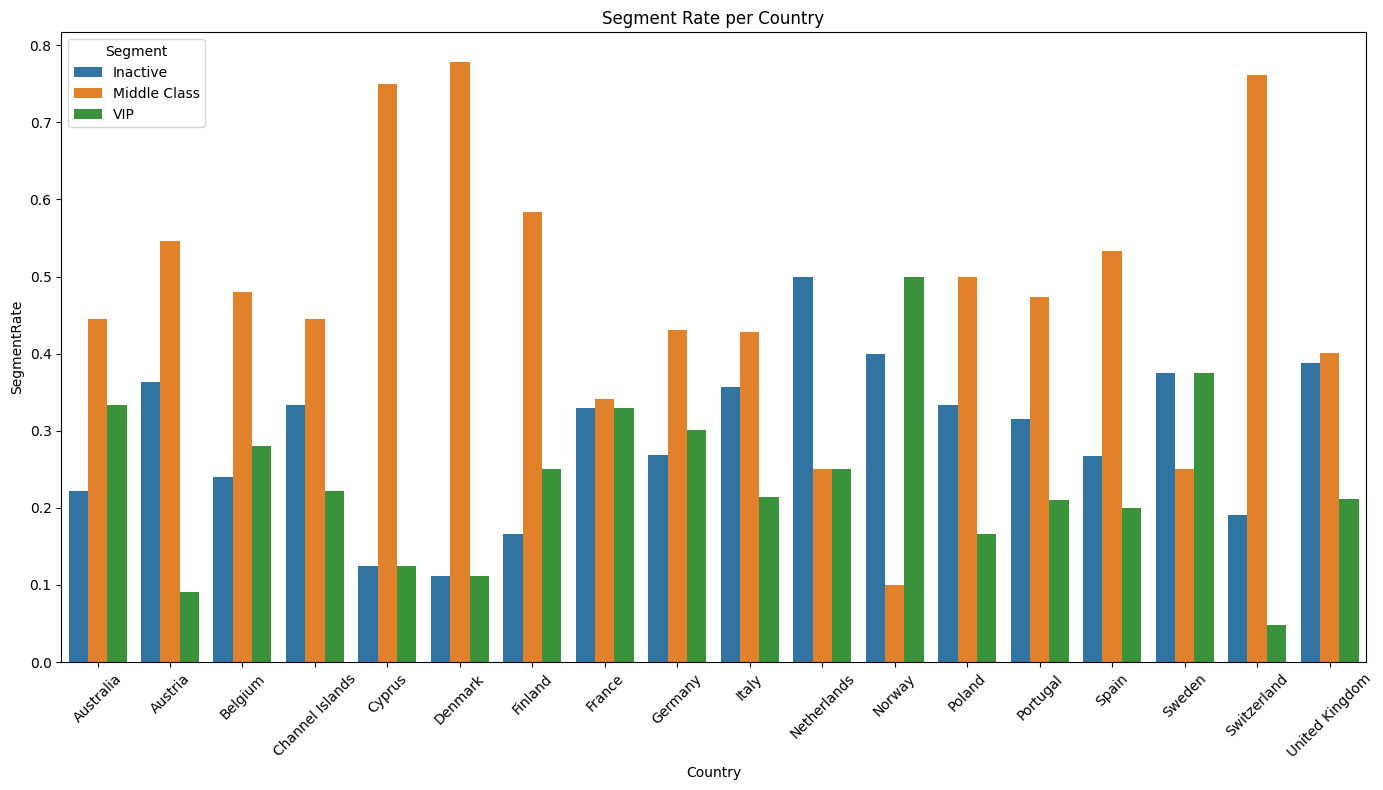

In [416]:
# plot segment rate per Country for countries with all class segments
countries_with_all_segments = segment_rate[segment_rate['Segment'].isin(['VIP', 'Middle Class', 'Inactive'])].copy()
countries_with_all_segments = countries_with_all_segments.groupby('Country').filter(lambda x: len(x) == 3)
countries_with_all_segments

plt.figure(figsize=(14, 8))
sns.barplot(data=countries_with_all_segments, x='Country', y='SegmentRate', hue='Segment')
plt.title('Segment Rate per Country')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


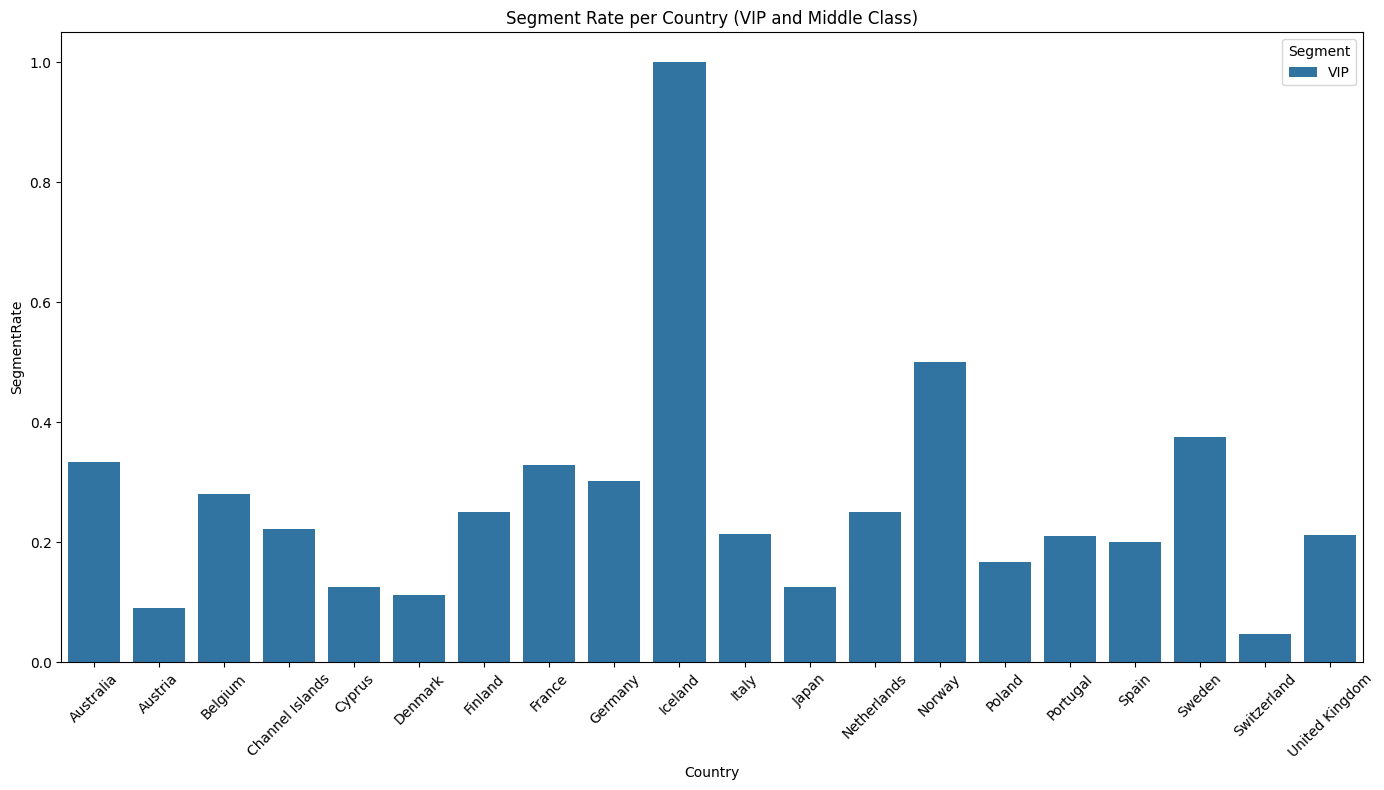

In [417]:
# Plot VIP by Country
plt.figure(figsize=(14, 8))
sns.barplot(data=segment_rate[segment_rate['Segment'].isin(['VIP'])], x='Country', y='SegmentRate', hue='Segment')
plt.title('Segment Rate per Country (VIP and Middle Class)')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


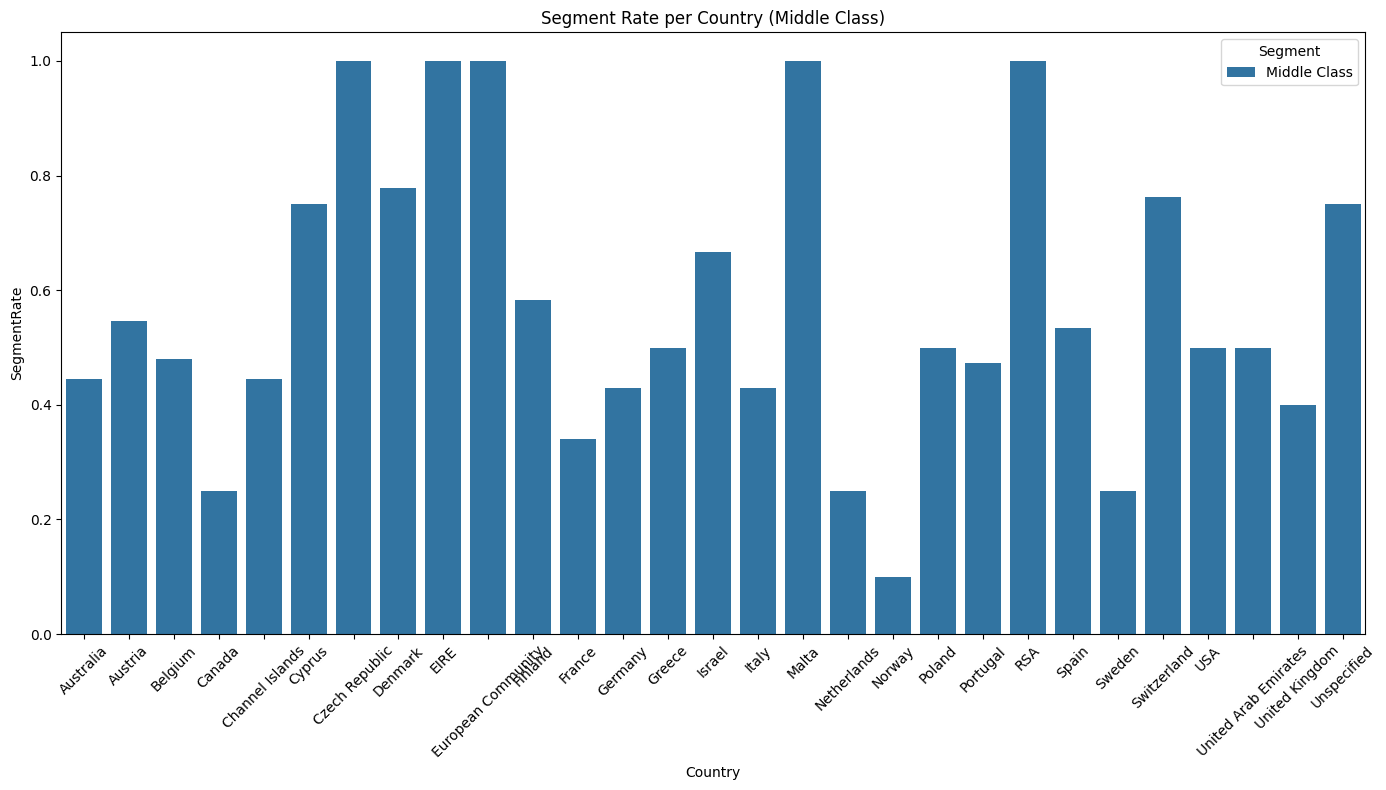

In [418]:
# Plt Middle Class rate by Country
plt.figure(figsize=(14, 8))
sns.barplot(data=segment_rate[segment_rate['Segment'].isin(['Middle Class'])], x='Country', y='SegmentRate', hue='Segment')
plt.title('Segment Rate per Country (Middle Class)')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()



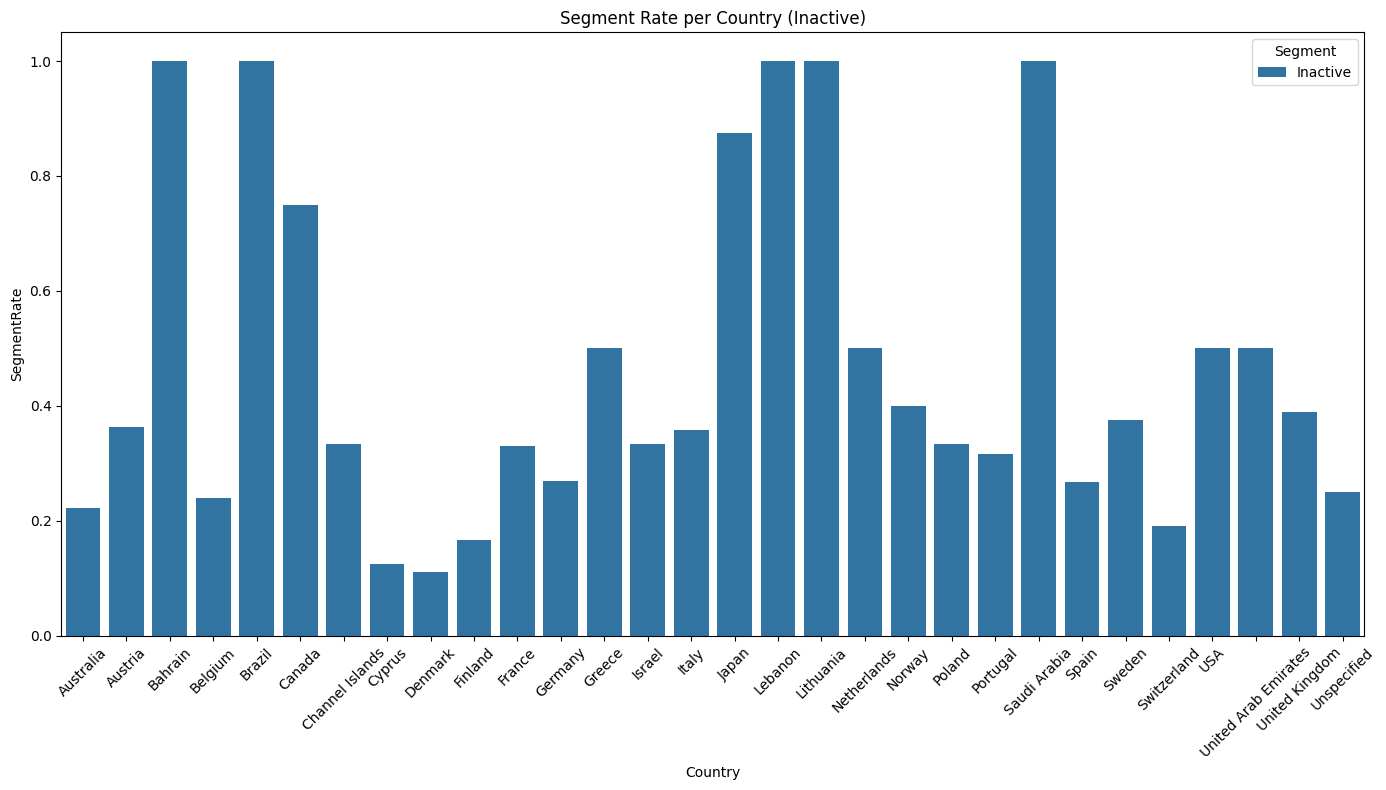

In [419]:
# plot Inactive rate by Country
plt.figure(figsize=(14, 8))
sns.barplot(data=segment_rate[segment_rate['Segment'].isin(['Inactive'])], x='Country', y='SegmentRate', hue='Segment')
plt.title('Segment Rate per Country (Inactive)')    
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [425]:
df['Description'] = df['Description'].astype(str).str.lower().str.strip()

In [431]:
df[df['Description']=='manual']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Segment,Year,Month,Type,IsReturned,OrderID,DayOfWeek,TimeOfDay
325,C545329,M,manual,-1,2011-03-01 15:47:00,280.05,12352,Norway,VIP,2011,March,return,Is a return,C545329_12352,Tuesday,15
326,C545329,M,manual,-1,2011-03-01 15:47:00,183.75,12352,Norway,VIP,2011,March,return,Is a return,C545329_12352,Tuesday,15
327,C545330,M,manual,-1,2011-03-01 15:49:00,376.50,12352,Norway,VIP,2011,March,return,Is a return,C545330_12352,Tuesday,15
328,545332,M,manual,1,2011-03-01 15:52:00,376.50,12352,Norway,VIP,2011,March,purchase,True,545332_12352,Tuesday,15
329,545332,M,manual,1,2011-03-01 15:52:00,280.05,12352,Norway,VIP,2011,March,purchase,True,545332_12352,Tuesday,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347137,C578073,M,manual,-36,2011-11-22 16:02:00,0.32,18139,United Kingdom,VIP,2011,November,return,Is a return,C578073_18139,Tuesday,16
347138,C578073,M,manual,-36,2011-11-22 16:02:00,0.56,18139,United Kingdom,VIP,2011,November,return,Is a return,C578073_18139,Tuesday,16
347139,C578076,M,manual,-24,2011-11-22 16:18:00,0.56,18139,United Kingdom,VIP,2011,November,return,Is a return,C578076_18139,Tuesday,16
353524,550957,M,manual,1,2011-04-21 16:37:00,1.95,18283,United Kingdom,VIP,2011,April,purchase,False,550957_18283,Thursday,16
